# Dataset 1:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

df1 = pd.read_csv('dataset1.csv')

x1 = df1.iloc[:, [0,1]].values
y1 = df1.iloc[:, 2].values

model1 = LogisticRegression(solver='liblinear', random_state = 0) 
model1.fit(x1, y1)
model1.score(x1, y1)

1.0

(1) The model's predictions are pretty accurate for dataset 1, a score of 1 means that it is 100%.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


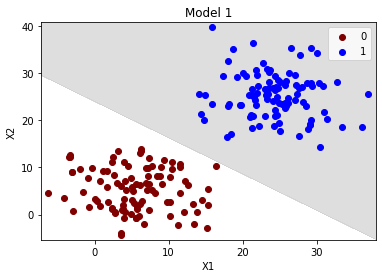

In [6]:
X1, X2 = np.meshgrid(np.arange(start = x1[:, 0].min() - 1,  
                               stop = x1[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = x1[:, 1].min() - 1,  
                               stop = x1[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, model1.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y1)): 
    plt.scatter(x1[y1 == j, 0], x1[y1 == j, 1], 
                c = ListedColormap(('maroon', 'blue'))(i), label = j) 

plt.title('Model 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Dataset 2:

In [7]:
df2 = pd.read_csv('dataset2.csv')

x2 = df2.iloc[:, [0,1]].values
y2 = df2.iloc[:, 2].values

model2 = LogisticRegression(solver='liblinear', random_state = 0) 
model2.fit(x2, y2)
model2.score(x2, y2)

0.542713567839196

(2) The model's predictions for dataset 2 are 50% compared to dataset 1 that was 100%.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


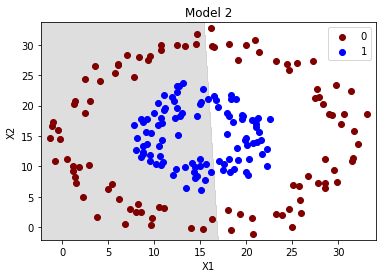

In [8]:
X1, X2 = np.meshgrid(np.arange(start = x2[:, 0].min() - 1,  
                               stop = x2[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = x2[:, 1].min() - 1,  
                               stop = x2[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, model2.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y2)): 
    plt.scatter(x2[y2 == j, 0], x2[y2 == j, 1], 
                c = ListedColormap(('maroon', 'blue'))(i), label = j) 

plt.title('Model 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

(3) The scatterplots for both datasets are shown above accordingly.<br/>For dataset 1, we are able to differentiate class 0 and 1, whereas for dataset 2 it is hard to tell due to data inconsistency and discrepancies.

(4) Gaussian Naive Bayes for dataset 1:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb2 = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.5, random_state = 1) 
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Gaussian Naive Bayes Dataset 1 Prediction %: "+str((y_test==y_pred).sum()))

Gaussian Naive Bayes Dataset 1 Prediction %: 100


(4) Gaussian Naive Bayes for dataset 2:

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.5, random_state = 1) 
y2_pred = gnb2.fit(X2_train, y2_train).predict(X2_test)
print("Gaussian Naive Bayes Dataset 2 Prediction %: "+str((y2_test==y2_pred).sum()))

Gaussian Naive Bayes Dataset 2 Prediction %: 100


These classifiers score well compared to logistic regression.<br/>The score accuracy is different for dataset 2 when compared to logistic regression.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x1, y1, stratify=y1, test_size=0.5, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, stratify=y2, test_size=0.5, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors = 3).fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

1.0

Both KNN classifiers fit the data 100% which is similar to how accurate the score was for Guassian Naive Bayes.

(6) Gaussian Naive Bayes:

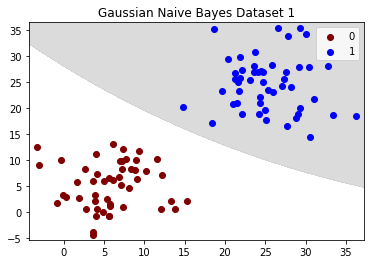

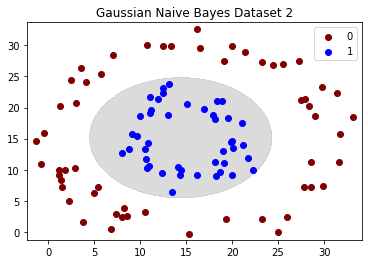

In [13]:
#Dataset 1

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.5, random_state = 1)
x_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1.0,  
                               stop = x_set[:, 0].max() + 1.0, step = 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1.0,  
                               stop = x_set[:, 1].max() + 1.0, step = 0.01)) 
  
plt.contourf(X1, X2,gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.80, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for a, b in enumerate(np.unique(y_set)): 
    pos = np.where(y_set==b)[0]
    plt.scatter(x_set[pos, 0], x_set[pos, 1], 
               c = np.array(ListedColormap(('maroon', 'blue'))(a)).reshape(1,-1), label = b) 
      
plt.title('Gaussian Naive Bayes Dataset 1') 
plt.legend() 
plt.show() 

#Dataset 2

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.5, random_state = 1)
x2_set, y2_set = X2_test, y2_test 
X1, X2 = np.meshgrid(np.arange(start = x2_set[:, 0].min() - 1.0,  
                               stop = x2_set[:, 0].max() + 1.0, step = 0.01), 
                     np.arange(start = x2_set[:, 1].min() - 1.0,  
                               stop = x2_set[:, 1].max() + 1.0, step = 0.01)) 
  
plt.contourf(X1, X2,gnb2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.80, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for a, b in enumerate(np.unique(y2_set)): 
    pos = np.where(y2_set==b)[0]
    plt.scatter(x2_set[pos, 0], x2_set[pos, 1], 
               c = np.array(ListedColormap(('maroon', 'blue'))(a)).reshape(1,-1), label = b) 
      
plt.title('Gaussian Naive Bayes Dataset 2') 
plt.legend() 
plt.show() 

Gaussian Naive Bayes fits a lot better compared to the graphs of Logistic Regression.

(6) K-Nearest Neighbor:

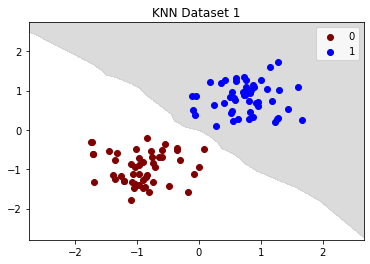

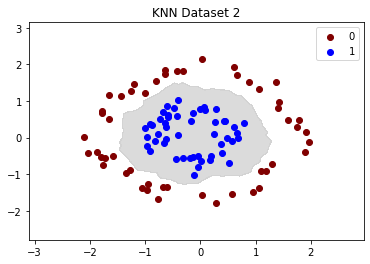

In [14]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS2 = StandardScaler()

#Dataset 1

X_train, X_test, y_train, y_test = train_test_split(x1, y1, stratify=y1, test_size=0.5, random_state=42)

X_train = SS.fit_transform(X_train)  
X_test = SS.transform(X_test) 

knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

x_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1.0,  
                               stop = x_set[:, 0].max() + 1.0, step = 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1.0,  
                               stop = x_set[:, 1].max() + 1.0, step = 0.01)) 
  
plt.contourf(X1, X2,knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.80, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for a, b in enumerate(np.unique(y_set)): 
    pos = np.where(y_set==b)[0]
    plt.scatter(x_set[pos, 0], x_set[pos, 1], 
               c = np.array(ListedColormap(('maroon', 'blue'))(a)).reshape(1,-1), label = b) 
      
plt.title('KNN Dataset 1') 
plt.legend()
plt.show()

#Dataset 2

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, stratify=y2, test_size=0.5, random_state=42)

X2_train = SS2.fit_transform(X2_train)  
X2_test = SS2.transform(X2_test) 

knn2 = KNeighborsClassifier(n_neighbors = 3).fit(X2_train, y2_train)

x2_set, y2_set = X2_test, y2_test 
X1, X2 = np.meshgrid(np.arange(start = x2_set[:, 0].min() - 1.0,  
                               stop = x2_set[:, 0].max() + 1.0, step = 0.01), 
                     np.arange(start = x2_set[:, 1].min() - 1.0,  
                               stop = x2_set[:, 1].max() + 1.0, step = 0.01)) 
  
plt.contourf(X1, X2,knn2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.80, cmap = ListedColormap(('white', 'lightgray'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for a, b in enumerate(np.unique(y2_set)): 
    pos = np.where(y2_set==b)[0]
    plt.scatter(x2_set[pos, 0], x2_set[pos, 1], 
               c = np.array(ListedColormap(('maroon', 'blue'))(a)).reshape(1,-1), label = b) 
      
plt.title('KNN Dataset 2')
plt.legend()
plt.show()

The boundaries for KNN are slightly better but similar to the accuracy of Gausian Naive Bayes.

References:  
https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification  
https://scikit-learn.org/stable/modules/naive_bayes.html  
https://www.astroml.org/book_figures/chapter9/fig_simple_naivebayes.html  
https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/  
https://medium.com/pursuitnotes/logistic-regression-model-in-9-steps-with-python-dbfd924f9305  